In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import pickle
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
boston = load_boston()
bos = pd.DataFrame(boston.data,columns = boston.feature_names)

In [6]:
bos['PRICE'] = boston.target

In [7]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
bos.isnull().sum() # To check null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

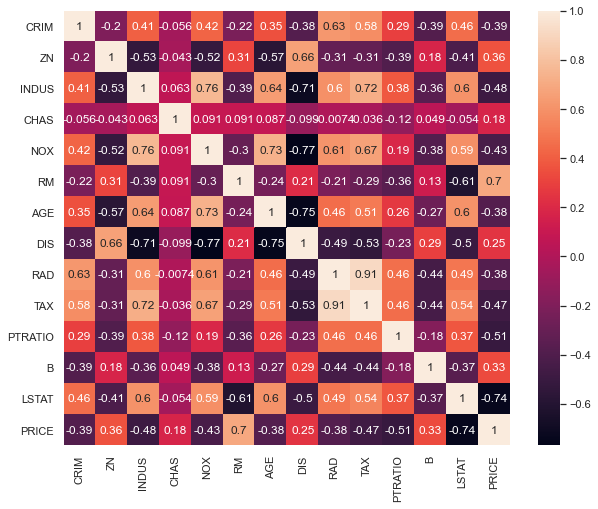

In [10]:
# Check correlation between each feature (more than 0.9 means highly correlated)
plt.figure(figsize=(10,8)) 
sns.heatmap(bos.corr(), annot = True)
plt.show()

In [9]:
# As we can see RAD and TAX has high correlation(0.91) between them. So let's drop TAX column
bos.drop('TAX', axis = 1, inplace = True)

In [10]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48,22.0


C:\Users\hsahu\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


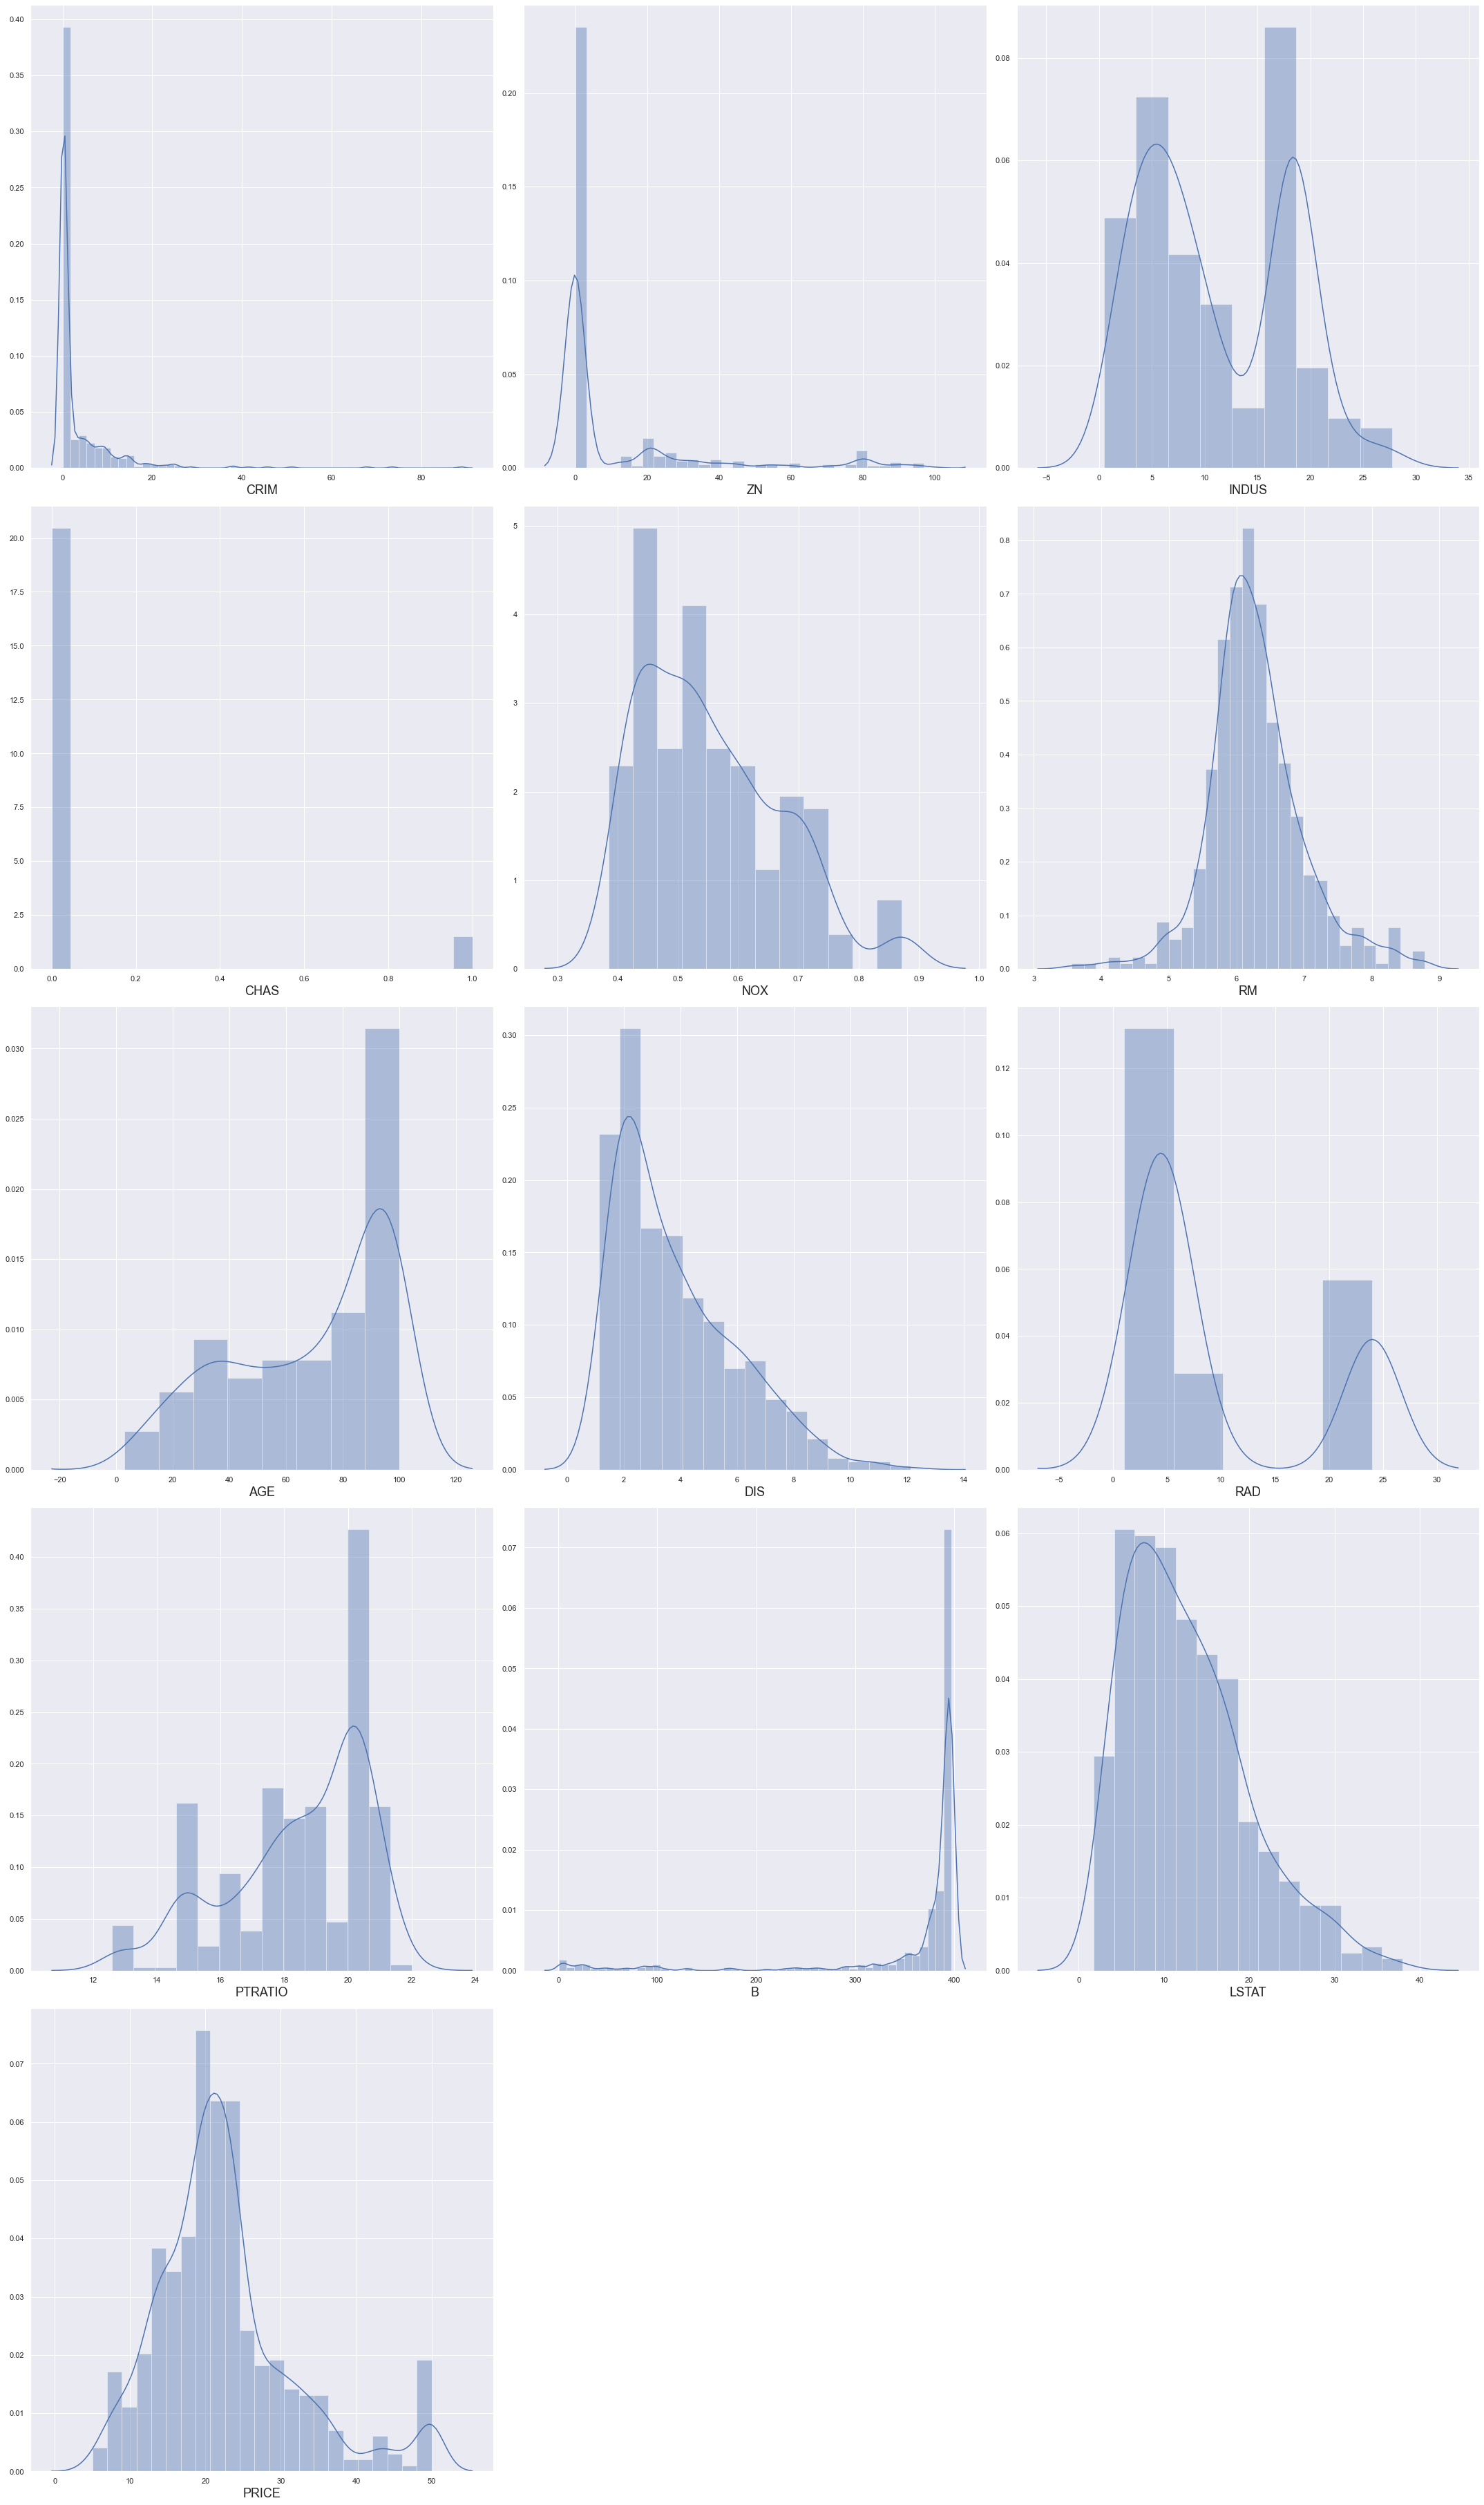

In [24]:
fig = plt.figure(figsize=(30,60))  # Let's Check the normalisation of each features
plotnumber = 1

for i in bos.columns:
    if plotnumber <=16:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(bos[i])
        plt.xlabel(i, fontsize= 18)
    plotnumber+=1
plt.tight_layout()

In [11]:
# As we can see almost every feature is normalised

In [12]:
x = bos[bos.columns[:-1]]
y = bos.PRICE

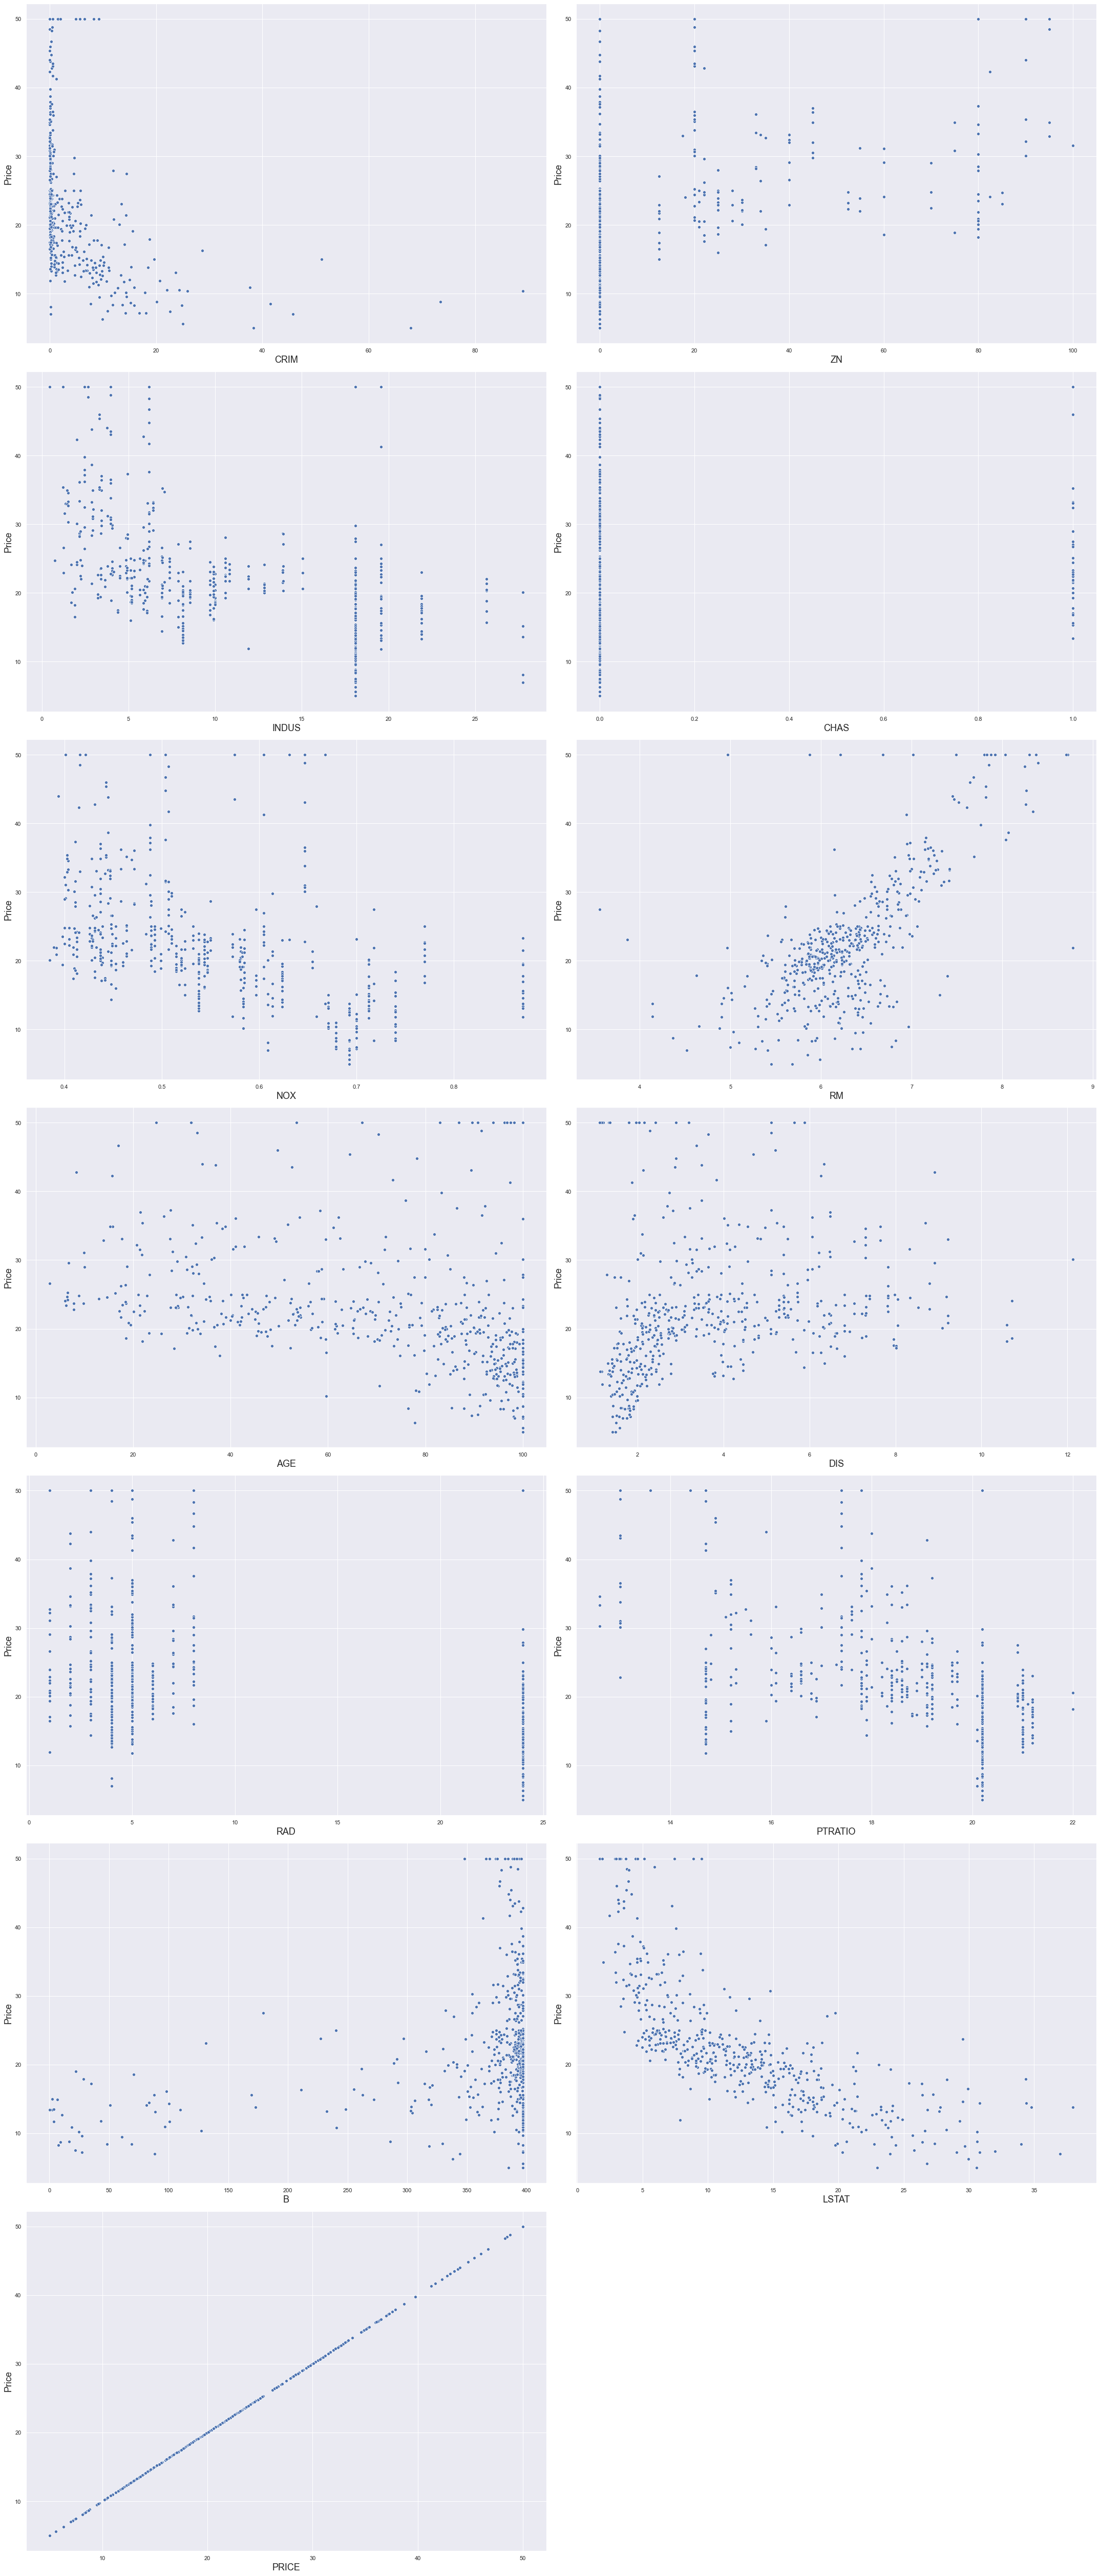

In [30]:
fig = plt.figure(figsize=(30,70))  # Let's Check the normalisation of each features
plotnumber = 1

for i in bos.columns:
    if plotnumber <=16:
        ax = plt.subplot(7,2,plotnumber)
        sns.scatterplot(x = bos[i], y = y)
        plt.xlabel(i, fontsize= 18)
        plt.ylabel('Price', fontsize = 18)
    plotnumber+=1
plt.tight_layout()

In [13]:
#  As we can see most of features are showing linear relation with Price so we will use Linear Regression Algo.

In [14]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_scaled, i) for i in range(x.shape[1])]
vif["features"] = x.columns

NameError: name 'x_scaled' is not defined

In [15]:
vif  # The VIF of each feature is less than 5 so we can proceed furthur

""


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=355)

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lin_reg.intercept_

28.998973937082273

In [19]:
lin_reg.coef_

array([-1.00771782e-01,  4.20753928e-02, -1.02096400e-01,  4.06411373e+00,
       -1.77039412e+01,  4.47946982e+00, -1.51953675e-02, -1.52260698e+00,
        1.16287813e-01, -8.92173933e-01,  9.11994407e-03, -4.08687544e-01])

In [20]:
lin_reg.score(x_train, y_train)

0.7263352878677987

In [21]:
lm = smf.ols(formula="PRICE ~ CRIM + ZN + INDUS + CHAS + NOX  + RM + AGE + DIS + RAD + PTRATIO + B + LSTAT", data = bos).fit()

In [22]:
lm.rsquared # As we can see keeping all features into consideration gives us 74.06% accuracy. Let's check r2_adj

0.7349713520894862

In [23]:
lm.rsquared_adj # R2_adj is slighly on lower side 

0.7285203505176279

In [24]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     113.9
Date:                Fri, 27 Nov 2020   Prob (F-statistic):          1.21e-133
Time:                        21:06:03   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6286      5.123      6.760      0.000      24.563      44.694
CRIM          -0.1067      0.033     -3.216      0.001      -0.172      -0.042
ZN             0.0364      0.014      2.692      0.007       0.010       0.063
INDUS         -0.0678      0.056     -1.214      0.225      -0.177       0.042
CHAS           3.0292      0.864      3.507      0.000       1.332       4.726
NOX          -18.7012      3.847     -4.862      0.000     -26.259     -11.143
RM             3.9117      0.421      9.294      0.000       3.085       4.739
AGE           -0.0006      0.013     -0.045      0.964      -0.027       0.026
DIS           -1.4883      0.201     -7.390      0.000      -1.884      -1.093
RAD            0.1346      0.041      3.262      0.001       0.054       0.216
PTRATIO       -0.9851      0.132     -7.478      0.000      -1.244      -0.726
B              0.0095      0.003      3.521      0.000       0.004       0.015
LSTAT         -0.5222      0.051    -10.198      0.000      -0.623      -0.422
==============================================================================
Omnibus:                      168.699   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.173
Skew:                           1.452   Prob(JB):                    3.35e-153
Kurtosis:                       7.987   Cond. No.                     1.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,36.2


In [26]:
lin_reg_test = LinearRegression()
lin_reg_test.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lin_reg_test.score(x_test, y_test)

0.7974824716862055

In [28]:
filename = 'final_model.pickle'
pickle.dump(lin_reg_test, open(filename, 'wb'))

In [29]:
boston = pickle.load(open(filename,'rb'))

In [30]:
bos.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [47]:
result = boston.predict([[3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,18.455534, 356.674032, 12.653063]])[0]
result

22.539547973485902

In [48]:
type(result)

numpy.float64

In [49]:
result.astype(np.float)

22.539547973485902